In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier, plot_tree,export_graphviz
from sklearn import tree
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

### Lendo a base de dados


In [3]:
dados = pd.read_excel('CCARDBALANCE.xlsx')
dados = dados.drop('ID',axis = 1)
display(dados)

,Renda,Limite,Rating,Cartoes,Idade,Educacao,Sexo,Estudante,Casado,Etnia,Gasto Mensal
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


### Corrigindo os valores de string para numeric

In [4]:
dados['Estudante'] = dados['Estudante'].replace({'Yes': 1, 'No': 0})
dados['Casado'] = dados['Casado'].replace({'Yes': 1, 'No': 0})
dados['Etnia'] = dados['Etnia'].replace({'Caucasian': 0, 'Asian': 1,'African American' : 2})
dados['Sexo'] = dados['Sexo'].replace({' Male':1,'Female':0})

In [5]:
display(dados)

,Renda,Limite,Rating,Cartoes,Idade,Educacao,Sexo,Estudante,Casado,Etnia,Gasto Mensal
0,14.891,3606,283,2,34,11,1,0,1,0,333
1,106.025,6645,483,3,82,15,0,1,1,1,903
2,104.593,7075,514,4,71,11,1,0,0,1,580
3,148.924,9504,681,3,36,11,0,0,0,1,964
4,55.882,4897,357,2,68,16,1,0,1,0,331
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,1,0,1,0,560
396,13.364,3838,296,5,65,17,1,0,0,2,480
397,57.872,4171,321,5,67,12,0,0,1,0,138
398,37.728,2525,192,1,44,13,1,0,1,0,0


### DataFrame para Classificação

In [21]:
dados_classificacao = pd.read_excel('CCARDBALANCE.xlsx')
dados_classificacao = dados_classificacao.drop('ID',axis = 1)
dados_classificacao.loc[dados['Gasto Mensal'] > 0, 'Gasto Mensal'] = 'Gastou'
dados_classificacao.loc[dados['Gasto Mensal'] == 0, 'Gasto Mensal'] = 'Não Gastou'
dados_classificacao['Estudante'] = dados['Estudante'].replace({'Yes': 1, 'No': 0})
dados_classificacao['Casado'] = dados['Casado'].replace({'Yes': 1, 'No': 0})
dados_classificacao['Etnia'] = dados['Etnia'].replace({'Caucasian': 0, 'Asian': 1,'African American' : 2})
dados_classificacao['Sexo'] = dados['Sexo'].replace({' Male':1,'Female':0})
display(dados_classificacao)

,Renda,Limite,Rating,Cartoes,Idade,Educacao,Sexo,Estudante,Casado,Etnia,Gasto Mensal
0,14.891,3606,283,2,34,11,1,0,1,0,Gastou
1,106.025,6645,483,3,82,15,0,1,1,1,Gastou
2,104.593,7075,514,4,71,11,1,0,0,1,Gastou
3,148.924,9504,681,3,36,11,0,0,0,1,Gastou
4,55.882,4897,357,2,68,16,1,0,1,0,Gastou
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,1,0,1,0,Gastou
396,13.364,3838,296,5,65,17,1,0,0,2,Gastou
397,57.872,4171,321,5,67,12,0,0,1,0,Gastou
398,37.728,2525,192,1,44,13,1,0,1,0,Não Gastou


### Classificação

In [29]:
X = dados_classificacao.drop('Gasto Mensal', axis = 1)
y = dados_classificacao['Gasto Mensal']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
modelo = DecisionTreeClassifier()
modelo.fit(X_train,y_train)
y_pred = modelo.predict(X_test)

In [42]:
feature = dados_classificacao.columns.drop('Gasto Mensal')
clas = ['Gasto Mensal']


Index(['Renda', 'Limite', 'Rating', 'Cartoes', 'Idade', 'Educacao', 'Sexo',
       'Estudante', 'Casado', 'Etnia'],
      dtype='object')


### Árvore de Classificação

Número de Folhas:  13
Profundidade:  6


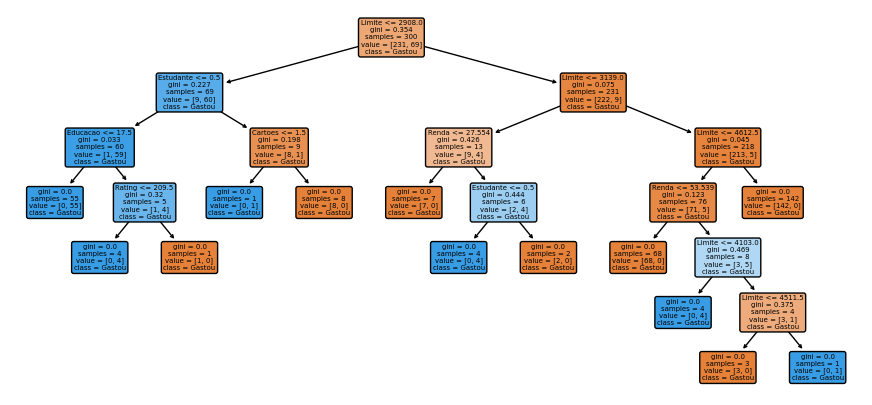

In [45]:
#Numero de folhas
print("Número de Folhas: ", modelo.get_n_leaves())

#Profundidade
print("Profundidade: ",modelo.get_depth())

#Obtem os parametros repassados. Nesse caso, por exemplo
#'criterion': 'gini', #'max_depth':5,n_leaves:9
 
#plotando a arvore de decisão com a função padrão do sklearn
plt.figure( figsize=(11,5),dpi=100)
plot_tree(modelo,feature_names= feature,  
                      class_names=clas,  
                      filled=True, rounded=True,fontsize=5.0
                    )
plt.show()

### Estatísticas de importância para o modelo

In [47]:
# Importância das características
importancias = modelo.feature_importances_
nomes_features = X.columns

# Imprimir importância das características
for feature, importancia in zip(nomes_features, importancias):
    print(feature, importancia)
print("Acurácia: ", modelo.score(X, y))

Renda 0.07965273983580619
Limite 0.7479508684861387
Rating 0.015057406361754186
Cartoes 0.01673045151306021
Idade 0.0
Educacao 0.0034506556245686815
Sexo 0.0
Estudante 0.1371578781786721
Casado 0.0
Etnia 0.0
Acurácia:  0.99


In [51]:
teste = {'Renda':50550 ,'Limite':1400,'Rating':650,'Cartoes':1,'Idade':20,'Educacao':17,'Sexo':1,'Estudante':1,'Casado':0,'Etnia':1}
teste_df = pd.DataFrame(data = teste, index=[0])
display(teste_df)
previsao = modelo.predict(teste_df)
print(previsao)

,Renda,Limite,Rating,Cartoes,Idade,Educacao,Sexo,Estudante,Casado,Etnia
0,50550,1400,650,1,20,17,1,1,0,1


['Não Gastou']


### Regressão

In [52]:
X = dados.drop('Gasto Mensal', axis = 1)
y = dados['Gasto Mensal']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
modelo = DecisionTreeRegressor()
modelo.fit(X_train,y_train)
y_pred = modelo.predict(X_test)

### Margem de erro

In [53]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)

RMSE: 148.77456099750387


# Teste

In [54]:
teste = {'Renda':40000 ,'Limite':1500,'Rating':700,'Cartoes':2,'Idade':20,'Educacao':17,'Sexo':1,'Estudante':1,'Casado':0,'Etnia':1}
teste_df = pd.DataFrame(data = teste, index=[0])
display(teste_df)
previsao = modelo.predict(teste_df)
print(previsao)

,Renda,Limite,Rating,Cartoes,Idade,Educacao,Sexo,Estudante,Casado,Etnia
0,40000,1500,700,2,20,17,1,1,0,1


[1107.]


### Quão importante é cada característica para o quanto de gasto mensal a pessoa vai ter, aqui podemos ver que etnia não faz a menor diferença.

In [55]:
# Importância das características
importancias = modelo.feature_importances_
nomes_features = X.columns

# Imprimir importância das características
for feature, importancia in zip(nomes_features, importancias):
    print(feature, importancia)
print("Acurácia: ", modelo.score(X, y))

Renda 0.08224655167311093
Limite 0.09131462024107344
Rating 0.7540091516853819
Cartoes 0.0049829085883131875
Idade 0.009951982194050343
Educacao 0.0027866978171075534
Sexo 0.0005100962054076138
Estudante 0.050302308619440614
Casado 0.001999302661481271
Etnia 0.0018963803146331865
Acurácia:  0.9737563515318592


### Pra ver o grafico que o professor fez, tenho que cortar ele um pouco ainda.

Número de Folhas:  238
Profundidade:  15


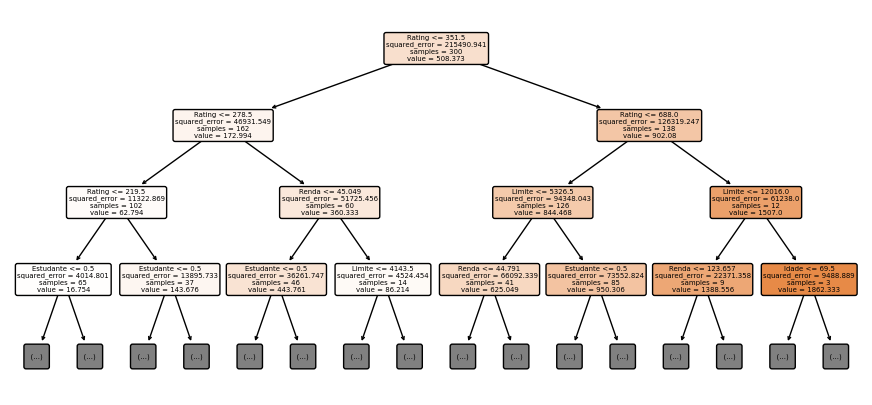

In [57]:
#Numero de folhas
print("Número de Folhas: ", modelo.get_n_leaves())

#Profundidade
print("Profundidade: ",modelo.get_depth())

#Obtem os parametros repassados. Nesse caso, por exemplo

 
#plotando a arvore de decisão com a função padrão do sklearn
plt.figure( figsize=(11,5),dpi=100)
plot_tree(modelo ,max_depth = 3 ,feature_names=['Renda', 'Limite', 'Rating', 'Cartoes', 'Idade', 'Educacao', 'Sexo',
       'Estudante', 'Casado', 'Etnia'],  
                      class_names=['Gasto Mensal'],
                      filled=True, rounded=True,fontsize=5.0  )
plt.show()

### Utilizando RandomForest

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)
modelo = RandomForestRegressor()
modelo.fit(X_train,y_train)
y_pred = modelo.predict(X_test)

In [59]:
teste = {'Renda':40000 ,'Limite':2500,'Rating':750,'Cartoes':2,'Idade':20,'Educacao':17,'Sexo':1,'Estudante':1,'Casado':0,'Etnia':1}
teste_df = pd.DataFrame(data = teste, index=[0])
display(teste_df)
previsao = modelo.predict(teste_df)
print(previsao)

,Renda,Limite,Rating,Cartoes,Idade,Educacao,Sexo,Estudante,Casado,Etnia
0,40000,2500,750,2,20,17,1,1,0,1


[760.97]


### R^2 menor, eu tambem não sei porque

In [60]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)

RMSE: 87.88533263292572


### Features do RandomForest são mais aprimoradas e a acurácia esta bem mais alta, o que pode ser ruim já que eu não tenho ideia se eu treinei o modelo do jeito certo.

In [61]:
# Importância das características
importancias = modelo.feature_importances_
nomes_features = X.columns

# Imprimir importância das características
for feature, importancia in zip(nomes_features, importancias):
    print(feature, importancia)
print("Acurácia: ", modelo.score(X, y))

Renda 0.07774509676398741
Limite 0.34378960002071246
Rating 0.5048723536149194
Cartoes 0.003201953180358759
Idade 0.007711273842884178
Educacao 0.003666686594461234
Sexo 0.0006377748762483393
Estudante 0.055580126603607456
Casado 0.001318575533179956
Etnia 0.001476558969640682
Acurácia:  0.9851695926297062


### Usando XGBoost.

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)
modelo = XGBRegressor()
modelo.fit(X_train,y_train)
y_pred = modelo.predict(X_test)

In [78]:
resultado = modelo.predict(teste_df)
print(resultado)

[799.5243]


In [79]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)

RMSE: 78.7833349922023


### Acurácia de quase 100%.

In [80]:
# Importância das características
importancias = modelo.feature_importances_
nomes_features = X.columns

# Imprimir importância das características
for feature, importancia in zip(nomes_features, importancias):
    print(feature, importancia)
print("Acurácia: ", modelo.score(X, y))

Renda 0.026520869
Limite 0.09002677
Rating 0.66081244
Cartoes 0.0019851765
Idade 0.002206139
Educacao 0.0015670513
Sexo 0.001480999
Estudante 0.21272369
Casado 0.001795675
Etnia 0.00088117406
Acurácia:  0.9926405812620638
